# World Cup 2022 Predictions
## By Christian Rodriguez

All relevant data and files can be accessed through __[GitHub](https://github.com/cr2230/world-cup-predictions-2022)__.

In [1]:
# importing libraries for analysis
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd
import numpy as np
from IPython import display

# reading nbc published odds data
dnbc = pd.read_csv('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/data/NBC%20Published%20Odds%202022.csv')

# reading world cup team data for 2022 games
da = pd.read_csv('https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/data/WC_2022.csv')
da['GF'] = pd.to_numeric(da['GF'], downcast = 'float')
da['GA'] = pd.to_numeric(da['GA'], downcast = 'float')
da['GP'] = pd.to_numeric(da['GP'], downcast = 'float')

# adding columns for team average values
da['GF_AVG'] = da['GF'] / da['GP']
da['GA_AVG'] = da['GA'] / da['GP']

#calculating league means
leagueGF = np.mean(da['GF'])
leagueGA = np.mean(da['GA'])
leagueGP = np.mean(da['GP'])

#calculating AS and DS values
da['AS'] = da['GF_AVG'] / leagueGF
da['DS'] = da['GA_AVG'] / leagueGA

# Overview
As the start of the 2022 FIFA World Cup looms around the corner in Qatar, the question that is on everyone's minds is which country will take it all. According to FIFA Men's Ranking for 2022, Brazil and Belgium appear as clear favorites to win the tournament given their rankings of first and second respectively. It should be noted that Brazil played 17 games in the World Cup Qualifiers without a single defeat and won 14 of them. This marks an impressive 82% win ratio. However, tournament strategies are much different than league strategies due to all games being played within a short time span and the elimination mechanics of successive rounds. This creates an environment where the marginal impact of players' decisions is significantly large and can directly translate to whether their team qualifies for the next round or is eliminated. Given the high stakes and the drama that is associated with the World Cup, another important question to consider is how likely "upsets" are, where lower ranked teams are able to defeat higher ranked teams.

These questions are of paramount importance to sportsbooks and sports bettors globally who risk capital on the outcomes of sporting events. Given that football (or "soccer" in North America) is the most popular sport in the world, there is no doubt that large sums of money will be associated with betting on this year's World Cup. Research conducted by __[Statista](https://www.statista.com/statistics/1186240/sports-betting-and-lottery-industry-market-size-global/)__ values the global sports betting market to be at \\$231.33 billion USD in 2022. It should be noted that these are estimates for the legal betting market, whereas the illegal market is estimated to generate over \\$1.7 trillion USD annually, according to a report from the __[United Nations Office on Drugs and Crime](https://www.bnnbloomberg.ca/illegal-sports-betting-nears-1-7-trillion-annually-u-n-says-1.1693602)__. The purpose of this project is to predict a likely tournament bracket and ultimately a winner to advise parties risking capital on outright bets for the 2022 FIFA World Cup. Sportsbooks have to precisely manage their risk as they're responsible for creating the markets and imprecise odds can lead to substantial losses for them. By assuming that sportsbooks are profit maximizing entities and there is no information asymmetry in the market, then it is possible to infer the implied probabilities of teams winning from the published odds. 

####  Table 1: NBC Published Odds - Nov 6, 2022

In [2]:
dnbc.head(32)

,Ranking,Group,Country,Published Odds,Decimal Odds,Implied Probability
0,1,G,Brazil,450,4.5,22%
1,4,D,France,550,5.5,18%
2,3,C,Argentina,650,6.5,15%
3,5,B,England,700,7.0,14%
4,7,E,Spain,800,8.0,13%
5,11,E,Germany,"1,000",10.0,10%
6,2,F,Belgium,"1,200",12.0,8%
7,8,A,Netherlands,"1,200",12.0,8%
8,9,H,Portugal,"1,200",12.0,8%
9,10,D,Denmark,"2,800",28.0,4%


From the odds published above by NBC which cites from various sportsbooks, the top favorites for the tournament are Brazil, France, and Argentina. This also seems logical given these teams' associated FIFA Men's Rankings. It should also be noted that 23 of the 32 teams have less than a 5% chance of winning the tournament. An important task is determine if any asymmetries exist with the published odds. Teams that are predicted to perform poorly by sportsbooks, but are predicted to do well with the model that is developed could present lucrative profits. For example, if the model predicts Croatia to win the tournament outright and they do indeed win, then a \\$100,00 bet would yield \\$5,000,000 in return. Teams such as Croatia in this example would be seen as having "deep value" whereas teams that are predicted to do well by the sportsbooks but not so well by our model, would be seen as expensive. Unlike financial securities where individuals have opportunities to salvage losses by selling back to the market, stakes in sports betting are not returned and are completely lost.

#### Figure 1: Croatia Payoff Structure

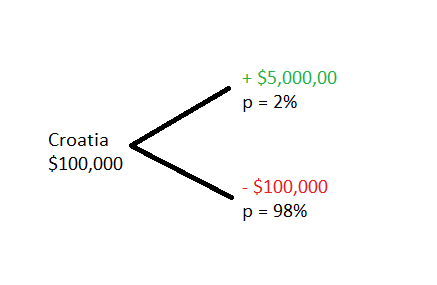

In [3]:
display.Image("https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/Croatia%20Payoff%20Structure.png")

This creates interesting payoff structures for potential bets as a majority of choices yield negative expected returns. Given the nature of losing 100% of a bettor's stake in the case of a loss, real value is only generated from winning bets, and thus the safer selections are estimated to have a higher guarantee of preserving and growing one's capital. The fundamental question of how trustworthy the published odds are stands and reinforces the importance of choosing the most likely winner.

As seen in Table 1, all teams are placed into a group where the teams in the group play each other to secure points: 3 points from a win, 1 point from a draw, and 0 from a loss. The top two teams will advance to the Round of 16, where single elimination matches will be played to determine advancement into the next round, and so on up to the final. In the case that two teams are tied for points, the team with a higher goal difference will take the contested spot. The tournament bracket is shown below in Figure 2, with 1 denoting the first place team and 2 denoting the second place team of the specified group. 

#### Figure 2: Tournament Bracket

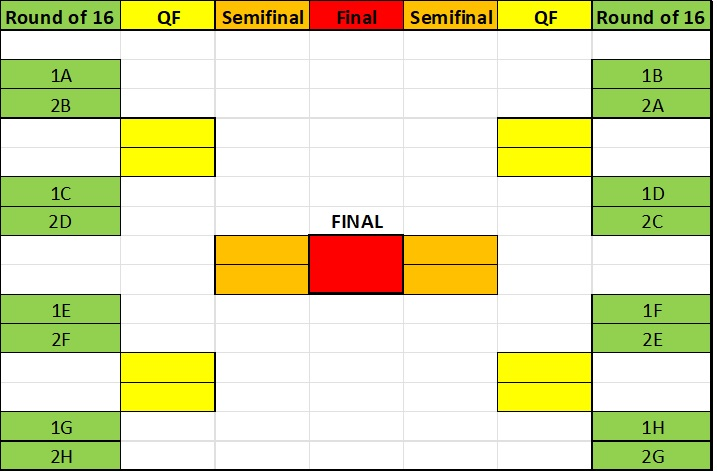

In [4]:
display.Image("https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket.jpg")

# Data and Methods
One could argue that there are millions of variables to look at when analyzing sporting events. Variables such as the weather or a player's mood can have effects on their performance and thus their team's chances of winning. To simplify the model in use, team variables and statistics will be used. This is because a team's performance is derived from its players' performances which already reflects the effects of variables such as those mentioned above. Furthermore, only a team's recent form will be considered as historical games do not reflect the current condition of a team going into the tournament. For example, statistics on head to head matches are not entirely useful as the World Cup is only hosted once every four years, and team rosters and their respective skills can differ substantially due to factors such as player age, injuries, and roster modifications. For this project, only data from 2022 matches will be used.

All teams have played matches in the 2022 World Cup Qualifiers but also in their respective regional tournaments. For example, South American teams recently competed in the Copa America and African teams recently played in the African Cup of Nations. Goals For (GF), Goals Against (GA), Games Played (GP), GF_AVG (Goals For Average), and GA_AVG (Goals Against Average) are collected from __[FootyStats](https://footystats.org/)__. Given that some teams have played more games than others, the statistics are standardized by using the means. The following statistics are shown below.

#### Table 2: Team Statistics

In [5]:
da.head(32)

,Team,GF,GA,GP,GF_AVG,GA_AVG,AS,DS
0,Argentina,26.0,2.0,9.0,2.888889,0.222222,0.170877,0.024187
1,Australia,13.0,7.0,9.0,1.444444,0.777778,0.085438,0.084656
2,Belgium,16.0,9.0,8.0,2.000000,1.125000,0.118299,0.122449
3,Brazil,27.0,3.0,8.0,3.375000,0.375000,0.199630,0.040816
4,Cameroon,20.0,14.0,15.0,1.333333,0.933333,0.078866,0.101587
5,Canada,21.0,9.0,12.0,1.750000,0.750000,0.103512,0.081633
6,Costa Rica,14.0,6.0,12.0,1.166667,0.500000,0.069008,0.054422
7,Croatia,12.0,8.0,9.0,1.333333,0.888889,0.078866,0.096750
8,Denmark,14.0,9.0,8.0,1.750000,1.125000,0.103512,0.122449
9,Ecuador,6.0,6.0,10.0,0.600000,0.600000,0.035490,0.065306


Using the statistics from above, an international league is made. One international league is made to determine the overall strengths of the teams and rank them relative to each other. This is also the case as the above teams have already played each other in the World Cup Qualifiers as well as in regional tournaments. League statistics for GF, GA, and GP are calculated as the mean of each which are 16.91, 9.19, and 11.0 respectively.

#### Equation 1: Expected Goals for a Team
team xG = team AS * opponent DS * leagueGF

A team's expected number of goals per match (team xG) will be used to determine our predictions. This is calculated using the variables AS, DS, and leagueGF. AS stands for Attack Strength and communicates a team's ability to score which is calculated using a team's average GF relative to the league's average GF. DS stands for Defence Strength and communicates a team's ability to conede goals on average, which is calculated in a similar manner as AS. One thing to note about DS is that the smaller the value, the better. For example, a high scoring team such as Argentina has an AS of 0.17 and a DS of 0.02 as they rarely concede goals. The model then multiplies the probability of a team scoring by their opponent's ability to defend and by the proababliity of scoring in the league.

#### Poisson Distributions
Using AS and DS which reflect a team's ability to score and concede goals respectively, a poisson distribution is used to calculate match score likelihoods for different matchups. The different probabilities of the match scores also reflect the probabilities of a team winning. In calculating the probabilties for match scores, only the score lines of 0-0, 0-1, 1-0, and 1-1 will be used. This is because goals in excess of 1 are of a low proabability in the model, but also because it is implied by the model that the team who is more likely to win 1-0 has a higher chance of winning in general, which accounts for the different score lines of 2-0, 2-1, and etc. Given the relative strength of teams in the league and the desire to prevent excessive draws in a bracket as 0-0 will always be the most likely score line, a team whose probability to win is significantly large, such as 0.12, will be awarded the win. As the teams are matched against each other, their points in the group will also be accounted for. In the event of a stalemate after all of a group's matches have been played, the team with the greater FIFA Men's Ranking will be awarded the contested spot. The examble below demonstrates the matchup process as well as the code used.

#### Group C Example: Argentina vs. Mexico 

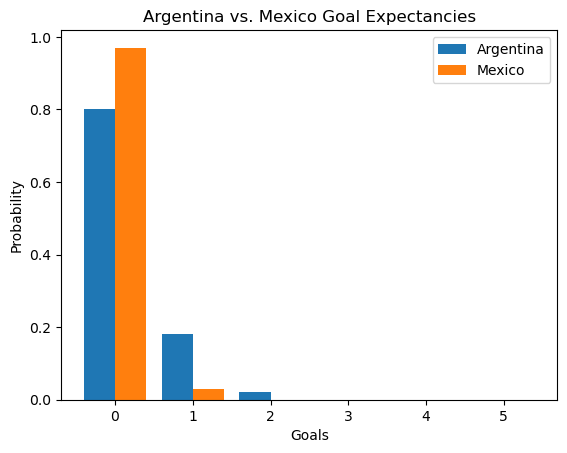

These are the score line probabilities:  [0.776, 0.024, 0.17459999999999998, 0.005399999999999999]


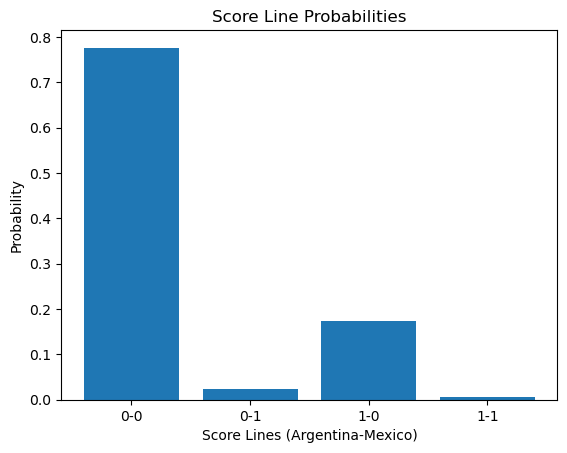

In [6]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][16]) * leagueGF

#Mexico xG
MexicoxG = (da['AS'][16]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Mexico probability mass function
Mexico_pmf = poisson.pmf(Goals, MexicoxG)
Mexico_pmf = np.round(Mexico_pmf, 2)
Mexico_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Mexico_pmf, 0.4, label = 'Mexico')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Mexico Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Mexico_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Mexico_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Mexico_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Mexico_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Mexico)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

As mentioned earlier, the most likely score line will always be 0-0 in a standardized league. From above, the second most likely score line is Argentina winning 1-0 which has a probability of 0.17459, or 17.46%. This is significantly large and Argentina would be awarded 3 points in the group for the win.

# Results

After simulating the matches with the model developed, it is predicted that Argentina will win the tournament, with Uruguay as a runner-up. Surprisingly, some low ranking teams have been predicted to advance to the Round of 16 such as Canada, Iran, Morocco, and Tunisia. This would surprise football analysts and sportsbooks around the world as tournament favorites such as Belgium, France, and Germany were eliminated during the group stage and did not advance to the Round of 16. Most notably, Uruguay and Senegal advanced to the semifinals despite their relatively low FIFA Men's Ranking of 14 and 18 respectively. On the other hand, Argentina and Brazil reaching the semifinals is directly in line with what sportsbooks predict. 

#### Figure 3: Tournament Bracket Predictions

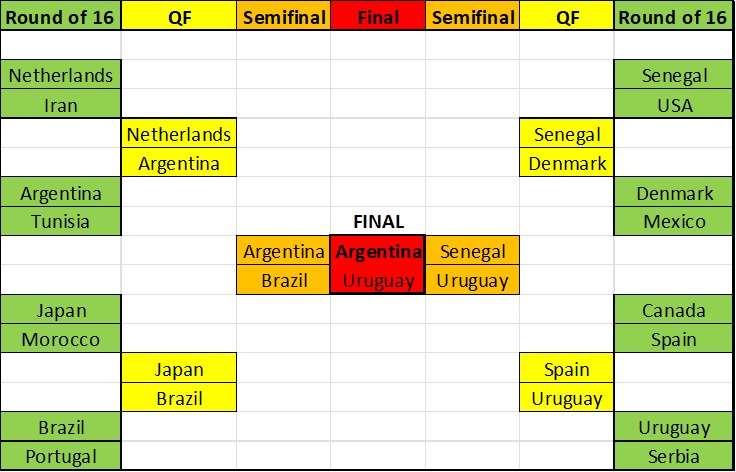

In [7]:
display.Image("https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%20Final.jpg")

# Conclusion
The results from the models would imply that the FIFA Men's Ranking and the published odds from sportsbooks cannot be solely relied on when asessing the potential winner for a matchup. Notably, there are a variety of tournament "dark horses" shown above in Figure 3 which made deep runs in the tournament such as Senegal and Uruguay.

#### Table 3: Semifinalist Statistics

In [8]:
dnbc.iloc[[0,2,11,13],[0, 2, 4, 5]]

,Ranking,Country,Decimal Odds,Implied Probability
0,1,Brazil,4.5,22%
2,3,Argentina,6.5,15%
11,14,Uruguay,50.0,2%
13,18,Senegal,80.0,1%


When observing the decimal odds of the semifinalists, Uruguay and Senegal appear as "deep value" picks for the tournament. According to the model, the best bet to make would be for Argentina to win the tournament outright as it presents as the most optimal choice for preserving capital. A \\$100,000 bet on Argentina to win outright would yield \\$450,000 in the scenario that they win.   However, if a bettor is chasing lucrative gains and is comfortable with a higher degree of risk, Uruguay is an attractive choice. Notably, a \\$100,000 bet on Uruguay to win would yield \\$5,000,000 in the scenario that they win. Additionally, bettors can also explore different betting markets and bet on teams to reach certain stages of the tournament instead. For example, a bettor can bet on Senegal to reach the Round of 16 or the Quarter Final instead of the Finals. Depending on a bettor's risk tolerance, they can adjust their selections to the different rounds. Given the model's predictions and the implied probabilities from sportsbooks, betting on Argentina and Brazil to reach an earlier round such as the Round of 16 or Quarter Final could be considered a safe bet. Betting on Uruguay or Senegal to reach earlier rounds of the tournament could also produce higher returns than betting on Argentina and Brazil as the sportsbooks do not view them as capable of making deep runs. 

The predictions by the model should be used to guide betting intuition and decision making, however it should not be relied on solely. This is because the model looks to simplify teams' performances and there are too many variables to account for when predicting human performance. For example, given that the World Cup will be hosted in Qatar, it can be hypothesized that teams who are adjusted to playing in hotter and more humid environments such as some African and Asian teams, could outperform teams who are adjusted to playing in wetter and colder environments such as some European teams. Additionally, team fatigue is a large determinant of performance in a short tournament such as the World Cup and is not accounted for by the model. For future research and analysis on this subject, a model that addresses more factors for determining team and individual performance may yield more optimal results, however this would go against the convention that a simpler model is much easier to interpret and has a higher chance of accurately representing reality. 

# Appendix


####  Table 1: NBC Published Odds - Nov 6, 2022

In [9]:
dnbc.head(32)

,Ranking,Group,Country,Published Odds,Decimal Odds,Implied Probability
0,1,G,Brazil,450,4.5,22%
1,4,D,France,550,5.5,18%
2,3,C,Argentina,650,6.5,15%
3,5,B,England,700,7.0,14%
4,7,E,Spain,800,8.0,13%
5,11,E,Germany,"1,000",10.0,10%
6,2,F,Belgium,"1,200",12.0,8%
7,8,A,Netherlands,"1,200",12.0,8%
8,9,H,Portugal,"1,200",12.0,8%
9,10,D,Denmark,"2,800",28.0,4%


#### Figure 1: Croatia Payoff Structure

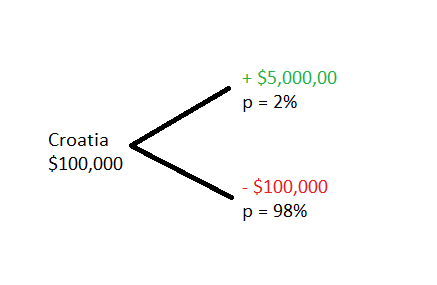

In [10]:
display.Image("https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/Croatia%20Payoff%20Structure.png")

#### Figure 2: Tournament Bracket

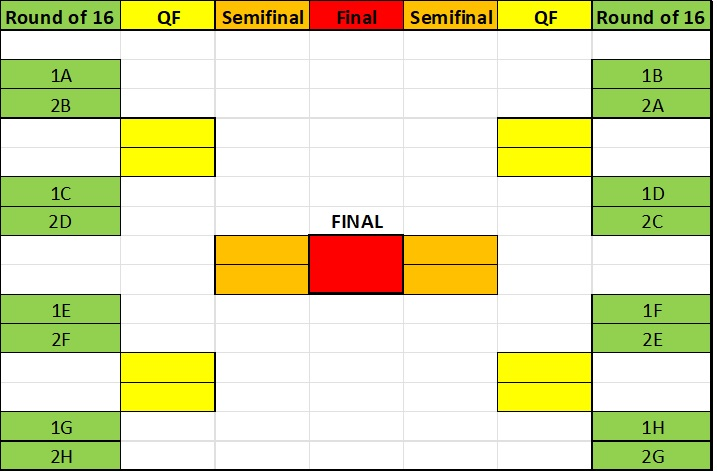

In [11]:
display.Image("https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket.jpg")

#### Table 2: Team Statistics

In [12]:
da.head(32)

,Team,GF,GA,GP,GF_AVG,GA_AVG,AS,DS
0,Argentina,26.0,2.0,9.0,2.888889,0.222222,0.170877,0.024187
1,Australia,13.0,7.0,9.0,1.444444,0.777778,0.085438,0.084656
2,Belgium,16.0,9.0,8.0,2.000000,1.125000,0.118299,0.122449
3,Brazil,27.0,3.0,8.0,3.375000,0.375000,0.199630,0.040816
4,Cameroon,20.0,14.0,15.0,1.333333,0.933333,0.078866,0.101587
5,Canada,21.0,9.0,12.0,1.750000,0.750000,0.103512,0.081633
6,Costa Rica,14.0,6.0,12.0,1.166667,0.500000,0.069008,0.054422
7,Croatia,12.0,8.0,9.0,1.333333,0.888889,0.078866,0.096750
8,Denmark,14.0,9.0,8.0,1.750000,1.125000,0.103512,0.122449
9,Ecuador,6.0,6.0,10.0,0.600000,0.600000,0.035490,0.065306


#### Equation 1: Expected Goals for a Team

team xG = team AS * opponent DS * leagueGF

#### Group C Example: Argentina vs. Mexico

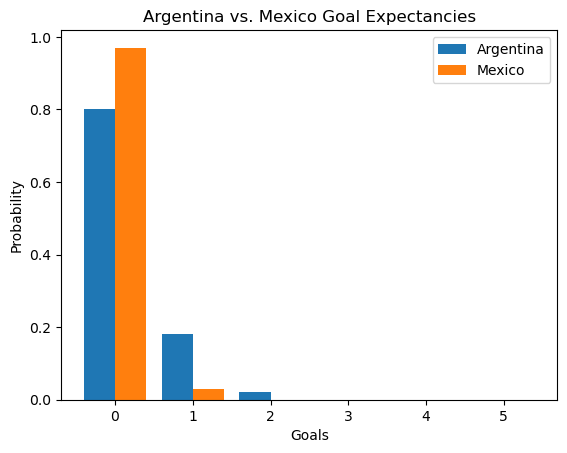

These are the score line probabilities:  [0.776, 0.024, 0.17459999999999998, 0.005399999999999999]


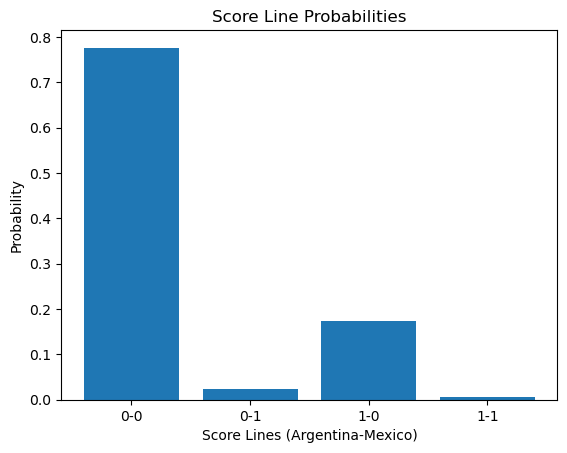

In [13]:
#Argentina xG
ArgentinaxG = (da['AS'][0]) * (da['DS'][16]) * leagueGF

#Mexico xG
MexicoxG = (da['AS'][16]) * (da['DS'][0]) * leagueGF

#setting k events for poisson distribution (the number of goals scored in a match)
Goals = [0, 1, 2, 3, 4, 5]

#Argentina probability mass function
Argentina_pmf = poisson.pmf(Goals, ArgentinaxG)
Argentina_pmf = np.round(Argentina_pmf, 2)
Argentina_pmf

#Mexico probability mass function
Mexico_pmf = poisson.pmf(Goals, MexicoxG)
Mexico_pmf = np.round(Mexico_pmf, 2)
Mexico_pmf

#graphing team goal expectancies
X_Labels = ['0', '1', '2', '3', '4', '5']
X_axis = np.arange(len(X_Labels))

plt.bar(X_axis - 0.2, Argentina_pmf, 0.4, label = 'Argentina')
plt.bar(X_axis + 0.2, Mexico_pmf, 0.4, label = 'Mexico')

plt.xticks(X_axis, X_Labels)
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.title("Argentina vs. Mexico Goal Expectancies")
plt.legend()
plt.show()

score_prob_lst = []
score_prob_lst.append(Argentina_pmf[0] * Mexico_pmf[0])
score_prob_lst.append(Argentina_pmf[0] * Mexico_pmf[1])
score_prob_lst.append(Argentina_pmf[1] * Mexico_pmf[0])
score_prob_lst.append(Argentina_pmf[1] * Mexico_pmf[1])

score_labels = ['0-0', '0-1', '1-0', '1-1']

plt.bar(score_labels,score_prob_lst)
plt.xlabel('Score Lines (Argentina-Mexico)')
plt.ylabel('Probability')
plt.title('Score Line Probabilities')

print('These are the score line probabilities: ', score_prob_lst)

#### Figure 3: Tournament Bracket Predictions

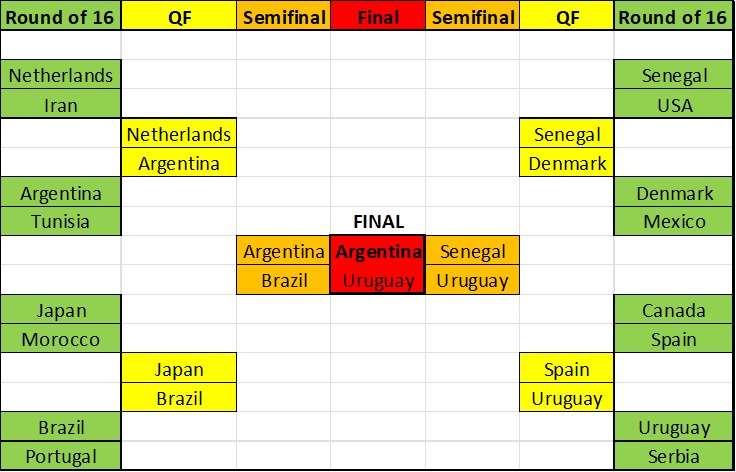

In [14]:
display.Image("https://raw.githubusercontent.com/cr2230/world-cup-predictions-2022/main/images/WC%20Bracket%20Final.jpg")

#### Table 3: Semifinalist Statistics

In [15]:
dnbc.iloc[[0,2,11,13],[0, 2, 4, 5]]

,Ranking,Country,Decimal Odds,Implied Probability
0,1,Brazil,4.5,22%
2,3,Argentina,6.5,15%
11,14,Uruguay,50.0,2%
13,18,Senegal,80.0,1%
